In [47]:
from torchvision.models import alexnet, vgg11, resnet18

In [48]:
vgg11()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [49]:
#Let's buid VGGNET by inheriting nn.Module

In [50]:
import torch
from torch import nn

In [51]:
class MyVGGNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.features =  nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64,  kernel_size=3, stride=1, padding=1, ),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=64, out_channels=128,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=128, out_channels=256,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=256, out_channels=256,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=256, out_channels=512,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=512, out_channels=512,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=512, out_channels=512,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=512, out_channels=512,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
    self.avgpool = nn.AdaptiveAvgPool2d(output_size=(7,7))
    
    self.classifier = nn.Sequential(
        nn.Linear(in_features=25088, out_features=4096, bias=True),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=4096, out_features=4096, bias=True),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=4096, out_features=1000, bias=True)
    )

  def forward(self,x):
    x = self.features(x)
    x = self.avgpool(x)
    x = self.classifer(x)

    return x

In [52]:
MyVGGNet()

MyVGGNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fal

In [53]:
# Another way of creating MYVGGNet
features =  nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64,  kernel_size=3, stride=1, padding=1, ),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=64, out_channels=128,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=128, out_channels=256,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=256, out_channels=256,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=256, out_channels=512,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=512, out_channels=512,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=512, out_channels=512,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=512, out_channels=512,  kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
avgpool = nn.AdaptiveAvgPool2d(output_size=(7,7))
    
classifier = nn.Sequential(
        nn.Linear(in_features=25088, out_features=4096, bias=True),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=4096, out_features=4096, bias=True),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=4096, out_features=1000, bias=True)
        )

layer_list = [features, avgpool, classifier]

class MyVGGNet1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.ModuleList(layer_list)
    self.trace = []

  def forward(self, x):
    for layer in self.layers:
      x = layer(x)
      self.trace.append(x)
    return x

In [54]:
MyVGGNet1()

MyVGGNet1(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): ReLU(inplace=True)
      (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (14): ReLU(inplace=True)
      (15): MaxPool2d(kernel_si

In [55]:
alexnet()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [56]:
model = vgg11(pretrained=True)

In [57]:
!pip install kaggle

In [58]:
creds = '{"username":"akshaybhandari","key":"96da7bd37edebde4db453ede35c71503"}'

In [59]:
from pathlib import Path
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
  cred_path.parent.mkdir(exist_ok=True)
  cred_path.write_text(creds)
  cred_path.chmod(0o600)  

In [60]:
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [61]:
!unzip -qq flowers-recognition.zip

replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
y


In [62]:
!rm -rf flowers/flowers

In [63]:
%matplotlib inline

import os
import random
from pathlib import Path


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import DataLoader, Dataset, random_split

import torchvision
from torchvision import datasets, models, transforms

In [64]:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [65]:
device

'cuda'

In [66]:
def first(x):
  try: return next(iter(x))
  except StopIteration: return None

def sigmoid_range(x, low, high):
  return torch.sigmoid(x) * (high - low) + low

In [67]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(244),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

data = datasets.ImageFolder(root='flowers', transform=transform)

In [68]:
split_ratio = 0.8
data_len = len(data)
train_size = int(split_ratio * data_len)
test_size = data_len - train_size

In [69]:
train_size, test_size

(3458, 865)

In [70]:
train_ds, test_ds = random_split(data, lengths=(train_size, test_size))

In [71]:
trainloader = DataLoader(train_ds, batch_size=32, shuffle=True)
testloader = DataLoader(test_ds, batch_size=32, shuffle=True)

In [72]:
train_ds[0][0].size(), len(train_ds)

(torch.Size([3, 244, 244]), 3458)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


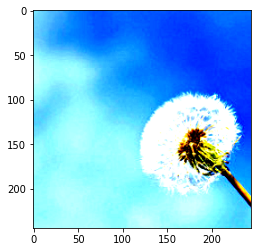

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


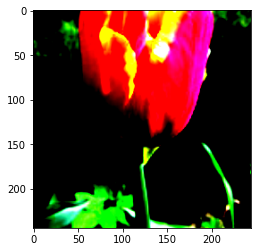

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


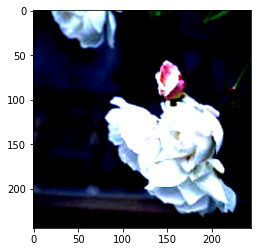

In [73]:
for i in range(3):
  temp = train_ds[i][0]
  temp = temp.numpy().transpose([1, 2, 0])
  plt.imshow(temp)
  plt.show()

In [74]:
class MyModel(nn.Module):
  def __init__(self, n_classes = 5, pretrained = False):
    super().__init__()
    self.input_layer = vgg11(pretrained=pretrained)
    self.fcl_1  = nn.Linear(1000, 512)
    self.fcl_2  = nn.Linear(512, 256)
    self.output_layer = nn.Linear(256, n_classes)

  def forward(self, x):
    x = self.input_layer(x)
    x = self.fcl_1(x)
    x = self.fcl_2(x)
    x = self.output_layer(x)
    return x

In [75]:
criterion = nn.CrossEntropyLoss()

In [81]:
def batch_accuracy(xb, yb):
  correct = (xb.argmax(1)) == yb
  return correct.float().mean().item()

def validate_epoch(model):
  epoch_loss = 0
  accuracy = 0
  model.eval()
  
  with torch.no_grad():
    for input_batch, labels in testloader:
      output = model(input_batch.to(device))
      loss = criterion(output, labels.to(device))
      epoch_loss += loss.item()
      accuracy += batch_accuracy(output, labels.to(device))

    accuracy /= len(testloader)
    epoch_loss /= len(testloader)
    return accuracy, epoch_loss
  
def train_model(model, num_epochs, print_every= 1):
  for i in range(num_epochs):
    epoch_loss = 0
    accuracy = 0
    model.train()

    for input_batch, labels in trainloader:
      output = model(input_batch.to(device))
      loss = criterion(output, labels.to(device))
      epoch_loss += loss.item()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      accuracy += batch_accuracy(output, labels.to(device))
   
    accuracy /= len(trainloader)
    epoch_loss /= len(trainloader)
    if (i+1) % print_every == 0:
      test_acc, test_loss = validate_epoch(model)
      print(f'| Epoch: {(i+1):02} | Train Loss: {epoch_loss:.3f} | Train Acc.: {accuracy:.3f} |'+ f' Val. Loss: {test_loss:.3f} | Val. Acc.: {test_acc:.3f} |')

In [82]:
model_no_pre = MyModel(5, False).to(device)

In [83]:
optimizer = optim.Adam(model_no_pre.parameters(), lr = 0.001)
train_model(model_no_pre, 5)

| Epoch: 01 | Train Loss: 1.849 | Train Acc.: 0.235 | Val. Loss: 1.601 | Val. Acc.: 0.227 |
| Epoch: 02 | Train Loss: 1.602 | Train Acc.: 0.239 | Val. Loss: 1.592 | Val. Acc.: 0.268 |
| Epoch: 03 | Train Loss: 1.600 | Train Acc.: 0.243 | Val. Loss: 1.593 | Val. Acc.: 0.268 |
| Epoch: 04 | Train Loss: 1.601 | Train Acc.: 0.238 | Val. Loss: 1.594 | Val. Acc.: 0.227 |
| Epoch: 05 | Train Loss: 1.600 | Train Acc.: 0.231 | Val. Loss: 1.602 | Val. Acc.: 0.227 |


In [85]:
model_pre = MyModel(5, True).to(device)
optimizer = optim.Adam(model_pre.parameters(), lr = 0.0001)
train_model(model_pre, 5)

| Epoch: 01 | Train Loss: 0.457 | Train Acc.: 0.835 | Val. Loss: 0.397 | Val. Acc.: 0.836 |
| Epoch: 02 | Train Loss: 0.164 | Train Acc.: 0.944 | Val. Loss: 0.302 | Val. Acc.: 0.902 |
| Epoch: 03 | Train Loss: 0.091 | Train Acc.: 0.972 | Val. Loss: 0.499 | Val. Acc.: 0.865 |
| Epoch: 04 | Train Loss: 0.101 | Train Acc.: 0.962 | Val. Loss: 0.379 | Val. Acc.: 0.897 |
| Epoch: 05 | Train Loss: 0.035 | Train Acc.: 0.987 | Val. Loss: 0.371 | Val. Acc.: 0.914 |


In [88]:
model_pre = MyModel(5, True).to(device)
optimizer = optim.Adam([
                        {'params': model_pre.input_layer.classifier.parameters(), 'lr':1e-4 },
                        {'params': model_pre.fcl_1.parameters(), 'lr':1e-4 },
                        {'params': model_pre.fcl_2.parameters(), 'lr':1e-4 },
                        {'params': model_pre.output_layer.parameters(), 'lr':1e-3} 
],)

train_model(model_pre, 5)

| Epoch: 01 | Train Loss: 0.528 | Train Acc.: 0.801 | Val. Loss: 0.387 | Val. Acc.: 0.879 |
| Epoch: 02 | Train Loss: 0.104 | Train Acc.: 0.968 | Val. Loss: 0.477 | Val. Acc.: 0.881 |
| Epoch: 03 | Train Loss: 0.029 | Train Acc.: 0.991 | Val. Loss: 0.486 | Val. Acc.: 0.892 |
| Epoch: 04 | Train Loss: 0.021 | Train Acc.: 0.994 | Val. Loss: 0.659 | Val. Acc.: 0.866 |
| Epoch: 05 | Train Loss: 0.040 | Train Acc.: 0.990 | Val. Loss: 0.531 | Val. Acc.: 0.881 |
